In [1]:
from astropy.table import Table
import numpy as np
import pandas
import matplotlib.pyplot as plt

filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"

In [3]:
df = Table.read(filePath, format='fits').to_pandas()
df.head()

,ID,RAJ2000,DECJ2000,MAG_GAAP_u,MAGERR_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,MAG_GAAP_i1,...,MAG_GAAP_H,MAGERR_GAAP_H,MAG_GAAP_Ks,MAGERR_GAAP_Ks,MASK,Z,ZERR,ZWARN,SPECTYPE,SUBTYPE
0,b'KiDSDR5 J083706.078+000000.11 ',129.275328,0.000031,20.071587,0.010908,20.030886,0.004359,20.716307,0.009988,19.953472,...,20.200041,0.033646,20.109331,0.041916,0,1.756564,0.000261,0,b'QSO ',b'HIZ '
1,b'KiDSDR5 J083756.584+000000.23 ',129.485767,0.000066,23.471176,0.237037,22.261936,0.035937,21.481810,0.021359,20.796877,...,19.311653,0.013936,18.908943,0.014110,8,0.709194,0.000223,0,b'QSO ',b'LOZ '
2,b'KiDSDR5 J083425.528+000002.21 ',128.606368,0.000616,99.000000,1.641267,23.785587,0.165958,22.665600,0.059048,21.769638,...,19.817320,0.024350,19.443457,0.026196,65,0.862850,0.000154,0,b'GALAXY',NaN
3,b'KiDSDR5 J083554.878+000001.11 ',128.978659,0.000311,22.868792,0.163624,20.338383,0.006099,19.012503,0.002129,18.491550,...,17.713032,0.003405,17.989992,0.006235,0,0.000060,0.000006,0,b'STAR ',b'K '
4,b'KiDSDR5 J083457.996+000004.19 ',128.741652,0.001166,24.488472,0.770079,23.819162,0.168246,22.265823,0.048881,21.349340,...,20.366919,0.034742,20.444654,0.057492,0,0.000239,0.000038,0,b'STAR ',b'K '


In [19]:
# magnitudes
magnitudes = ['MAG_GAAP_u','MAG_GAAP_g', 'MAG_GAAP_r','MAG_GAAP_i1', 'MAG_GAAP_i2',
          'MAG_GAAP_Z', 'MAG_GAAP_Y','MAG_GAAP_J', 'MAG_GAAP_H','MAG_GAAP_Ks']

colors = ['u-g', 'u-r', 'u-i1', 'u-i2', 'u-Z', 'u-Y','u-J', 'u-H', 'u-Ks', 'g-r', 'g-i1', 'g-i2',
          'g-Z', 'g-Y', 'g-J', 'g-H','g-Ks', 'r-i1', 'r-i2', 'r-Z', 'r-Y', 'r-J', 'r-H', 'r-Ks', 
          'i1-i2','i1-Z', 'i1-Y', 'i1-J', 'i1-H', 'i1-Ks', 'i2-Z', 'i2-Y', 'i2-J', 'i2-H','i2-Ks', 
          'Z-Y', 'Z-J', 'Z-H', 'Z-Ks', 'Y-J', 'Y-H', 'Y-Ks', 'J-H','J-Ks', 'H-Ks']

quasar = df["SPECTYPE"][0]
galaxy = df["SPECTYPE"][2]
star = df["SPECTYPE"][3]

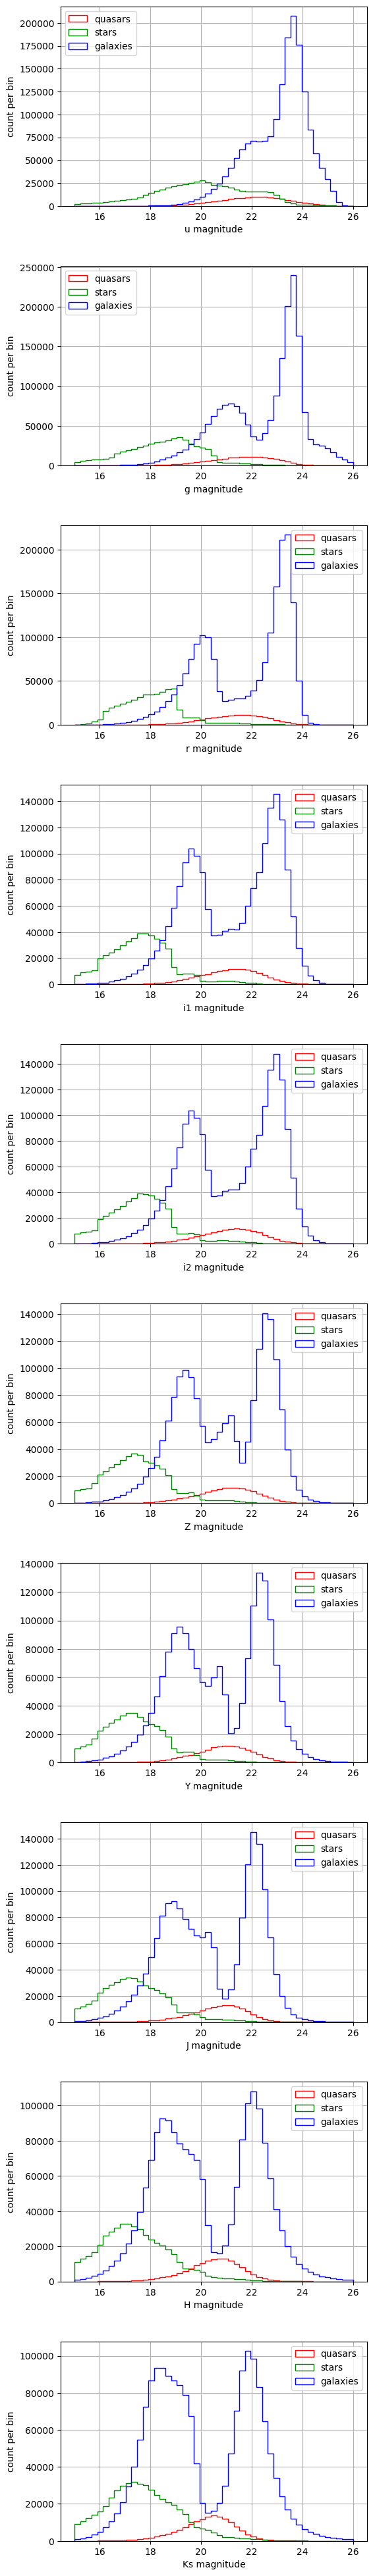

In [12]:
# magnitudes
magnitudes = ['MAG_GAAP_u','MAG_GAAP_g', 'MAG_GAAP_r','MAG_GAAP_i1', 'MAG_GAAP_i2',
          'MAG_GAAP_Z', 'MAG_GAAP_Y','MAG_GAAP_J', 'MAG_GAAP_H','MAG_GAAP_Ks']

fig, axes = plt.subplots(10,1, figsize=(6,50))

for mag, ax in zip(magnitudes, axes):
    ax.hist(df[df["SPECTYPE"] == quasar][mag], np.linspace(15,26,50), histtype='step', label="quasars", color="r")
    ax.hist(df[df["SPECTYPE"] == star][mag], np.linspace(15,26,50), histtype='step', label="stars", color="g")
    ax.hist(df[df["SPECTYPE"] == galaxy][mag], np.linspace(15,26,50), histtype='step', label="galaxies", color="b")
    ax.set_xlabel(f"{mag.split('_')[-1]} magnitude")
    ax.set_ylabel("count per bin")
    ax.set_yscale("linear")
    ax.legend()
    ax.grid()
    
plt.subplots_adjust(wspace=0.25, hspace=0.3)

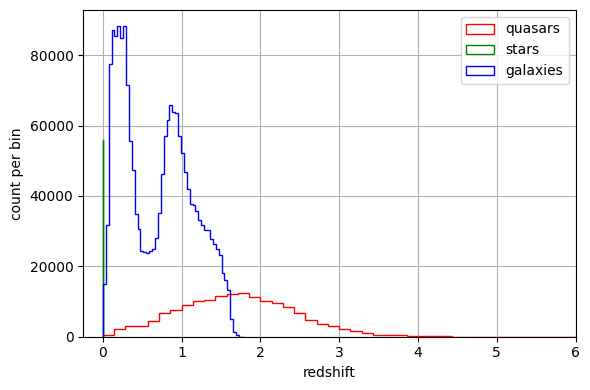

In [25]:
fig, ax = plt.subplots(figsize=(6,4))

# Histogram for quasars
ax.hist(df[df["SPECTYPE"] == quasar]["Z"], np.linspace(0,7,50), 
        histtype='step', label="quasars", color="r")
ax.hist(df[df["SPECTYPE"] == star]["Z"], np.linspace(0,0.0021,50), 
        histtype='step', label="stars", color="g")
ax.hist(df[df["SPECTYPE"] == galaxy]["Z"], np.linspace(0,1.8,50), 
        histtype='step', label="galaxies", color="b")

ax.set_xlabel("redshift")
ax.set_ylabel("count per bin")
ax.set_yscale("linear")
ax.set_xlim(-0.25, 6)
ax.legend()
ax.grid()

plt.tight_layout()

In [17]:
from itertools import combinations

pairs = list(combinations(magnitudes, 2))
for pair in pairs:
    mag1 = pair[0]
    mag2 = pair[1]
    
    df[f"{mag1.split('_')[-1]}-{mag2.split('_')[-1]}"] = df[mag1] - df[mag2]
    
df.head()

,ID,RAJ2000,DECJ2000,MAG_GAAP_u,MAGERR_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,MAG_GAAP_i1,...,Z-Y,Z-J,Z-H,Z-Ks,Y-J,Y-H,Y-Ks,J-H,J-Ks,H-Ks
0,b'KiDSDR5 J083706.078+000000.11 ',129.275328,0.000031,20.071587,0.010908,20.030886,0.004359,20.716307,0.009988,19.953472,...,-0.005089,-0.170225,-0.079067,0.011642,-0.165136,-0.073978,0.016731,0.091158,0.181868,0.090710
1,b'KiDSDR5 J083756.584+000000.23 ',129.485767,0.000066,23.471176,0.237037,22.261936,0.035937,21.481810,0.021359,20.796877,...,0.296448,0.610331,0.985743,1.388453,0.313883,0.689295,1.092005,0.375412,0.778122,0.402710
2,b'KiDSDR5 J083425.528+000002.21 ',128.606368,0.000616,99.000000,1.641267,23.785587,0.165958,22.665600,0.059048,21.769638,...,0.326630,0.771509,1.200291,1.574154,0.444880,0.873661,1.247524,0.428782,0.802645,0.373863
3,b'KiDSDR5 J083554.878+000001.11 ',128.978659,0.000311,22.868792,0.163624,20.338383,0.006099,19.012503,0.002129,18.491550,...,0.173746,0.292788,0.455297,0.178337,0.119041,0.281551,0.004591,0.162510,-0.114450,-0.276960
4,b'KiDSDR5 J083457.996+000004.19 ',128.741652,0.001166,24.488472,0.770079,23.819162,0.168246,22.265823,0.048881,21.349340,...,0.128813,0.305836,0.462543,0.384808,0.177023,0.333731,0.255995,0.156708,0.078972,-0.077736


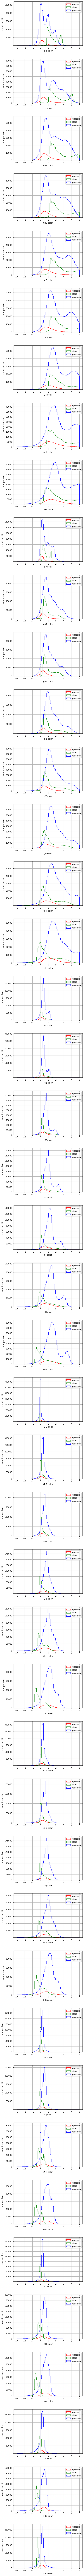

In [26]:
fig, axes = plt.subplots(45,1, figsize=(6,225))

for col, ax in zip(colors, axes):
    ax.hist(df[df["SPECTYPE"] == quasar][col], np.linspace(-3,5,100), histtype='step', label="quasars", color="r")
    ax.hist(df[df["SPECTYPE"] == star][col], np.linspace(-3,5,100), histtype='step', label="stars", color="g")
    ax.hist(df[df["SPECTYPE"] == galaxy][col], np.linspace(-3,5,100), histtype='step', label="galaxies", color="b")
    ax.set_xlabel(f"{col} color")
    ax.set_ylabel("count per bin")
    ax.set_yscale("linear")
    ax.legend()
    ax.grid()
    
plt.subplots_adjust(wspace=0.25, hspace=0.3)